# GemPy Paper Code: Likelihoods

In this notebook you will be able to see and run the code utilized to create the figures of the paper *GemPy - an open-source library for implicit geological modeling and uncertainty quantification*

In [2]:
# Importing dependencies

# These two lines are necessary only if gempy is not installed
import sys, os
sys.path.append("../..")
import gempy as gp
%matplotlib inline
from copy import copy, deepcopy
# Aux imports

import numpy as np
import pandas as pn
import matplotlib.pyplot as plt

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


## Uncertainty Quatification.

In this model we will explore how to create a model of GemPy with PyMC which some of the parameters are stochastic  in order to quatify the uncertainty that those parameters propagate to the final results.

We will use the same model as until now

here
there
there
there


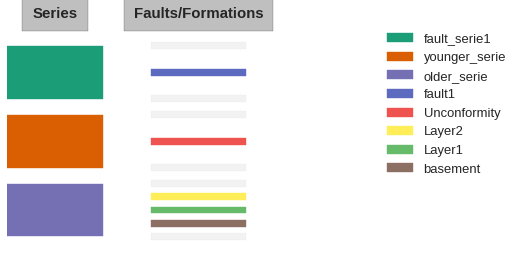

In [3]:

geo_data = gp.create_data([-10,30,-10,20,-10,0],[20,20,20],
                         path_o = "../input_data/paper_Orientations.csv",
                         path_i = "../input_data/paper_Points.csv")
geo_data.add_interface(X=10, Y=4, Z=-7, formation='fault1')

gp.set_series(geo_data, {'fault_serie1': 'fault1','younger_serie' : 'Unconformity', 'older_serie': ('Layer1', 'Layer2')},
              order_formations= ['fault1', 'Unconformity', 'Layer2', 'Layer1'], verbose=2)

geo_data.modify_interface(9, Z = -6.4)

In [3]:
# geo_data = gp.select_series(geo_data, ['younger_serie',
#                                        'older_serie'])

In [4]:
#geo_data.set_formations(formation_values=[1,2,3])

In [5]:
geo_data.formations

,value,formation_number
fault1,1,1
Unconformity,2,2
Layer2,3,3
Layer1,4,4
basement,5,5


In [6]:
geo_data.update_df()

there


In [7]:
# vtk = gp.plot.vtk_plot(geo_data)
# vtk.plot_data_3D()

In [8]:
geo_data.interfaces

,X,Y,Z,formation,series,formation_number,order_series,isFault,annotations,formation_value
0,4.345153,5.0,-1.921564,fault1,fault_serie1,1,1,True,"${\bf{x}}_{\alpha \,{\bf{1}},0}$",1
1,10.000000,4.0,-7.000000,fault1,fault_serie1,1,1,True,"${\bf{x}}_{\alpha \,{\bf{1}},1}$",1
2,2.303022,5.0,-1.647248,Unconformity,younger_serie,2,2,False,"${\bf{x}}_{\alpha \,{\bf{2}},0}$",2
3,1.083840,5.0,-1.738687,Unconformity,younger_serie,2,2,False,"${\bf{x}}_{\alpha \,{\bf{2}},1}$",2
4,8.825648,5.0,-3.140747,Unconformity,younger_serie,2,2,False,"${\bf{x}}_{\alpha \,{\bf{2}},2}$",2
5,15.561631,5.0,-3.232185,Unconformity,younger_serie,2,2,False,"${\bf{x}}_{\alpha \,{\bf{2}},3}$",2
6,2.059186,5.0,-4.908561,Layer2,older_serie,3,3,False,"${\bf{x}}_{\alpha \,{\bf{3}},0}$",3
7,11.843125,5.0,-5.761989,Layer2,older_serie,3,3,False,"${\bf{x}}_{\alpha \,{\bf{3}},1}$",3
8,15.317795,5.0,-6.493498,Layer2,older_serie,3,3,False,"${\bf{x}}_{\alpha \,{\bf{3}},2}$",3
9,2.211584,5.0,-6.400000,Layer1,older_serie,4,3,False,"${\bf{x}}_{\alpha \,{\bf{4}},0}$",4


In [9]:
geo_data.orientations

,X,Y,Z,G_x,G_y,G_z,dip,azimuth,polarity,formation,series,formation_number,order_series,isFault,annotations,formation_value
0,9.053956,5.0,-6.646000,0.637572,1.000000e-07,0.770391,39.611,90.0,1,fault1,fault_serie1,1,1,True,"${\bf{x}}_{\beta \,{\bf{1}},0}$",1
1,9.907953,5.0,-2.422365,-0.023246,1.000000e-07,0.999730,1.332,270.0,1,Unconformity,younger_serie,2,2,False,"${\bf{x}}_{\beta \,{\bf{2}},0}$",2
2,2.942956,5.0,-3.659000,-0.365657,1.000000e-07,0.930750,21.448,270.0,1,Layer2,older_serie,3,3,False,"${\bf{x}}_{\beta \,{\bf{3}},0}$",3
3,16.079956,5.0,-5.792000,0.588167,1.000000e-07,0.808740,36.027,90.0,1,Layer1,older_serie,4,3,False,"${\bf{x}}_{\beta \,{\bf{4}},0}$",4


../..\gempy\gempy_front.py:791: FutureWarning: gempy plotting functionality will be moved in version 1.2, use gempy.plot module instead
  warnings.warn("gempy plotting functionality will be moved in version 1.2, use gempy.plot module instead", FutureWarning)


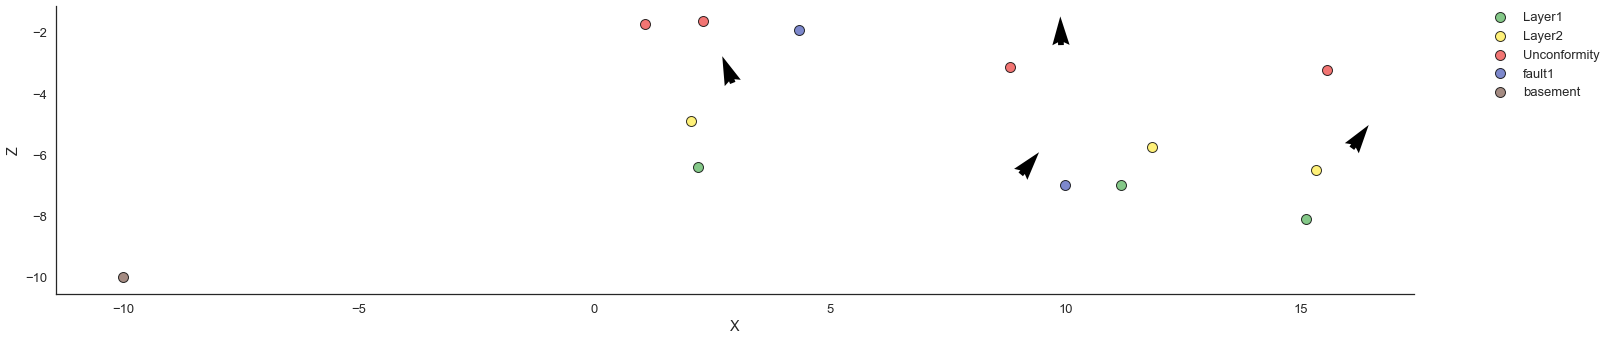

In [10]:
gp.plot_data(geo_data, direction="y")

In [11]:
geo_data.interfaces

,X,Y,Z,formation,series,formation_number,order_series,isFault,annotations,formation_value
0,4.345153,5.0,-1.921564,fault1,fault_serie1,1,1,True,"${\bf{x}}_{\alpha \,{\bf{1}},0}$",1
1,10.000000,4.0,-7.000000,fault1,fault_serie1,1,1,True,"${\bf{x}}_{\alpha \,{\bf{1}},1}$",1
2,2.303022,5.0,-1.647248,Unconformity,younger_serie,2,2,False,"${\bf{x}}_{\alpha \,{\bf{2}},0}$",2
3,1.083840,5.0,-1.738687,Unconformity,younger_serie,2,2,False,"${\bf{x}}_{\alpha \,{\bf{2}},1}$",2
4,8.825648,5.0,-3.140747,Unconformity,younger_serie,2,2,False,"${\bf{x}}_{\alpha \,{\bf{2}},2}$",2
5,15.561631,5.0,-3.232185,Unconformity,younger_serie,2,2,False,"${\bf{x}}_{\alpha \,{\bf{2}},3}$",2
6,2.059186,5.0,-4.908561,Layer2,older_serie,3,3,False,"${\bf{x}}_{\alpha \,{\bf{3}},0}$",3
7,11.843125,5.0,-5.761989,Layer2,older_serie,3,3,False,"${\bf{x}}_{\alpha \,{\bf{3}},1}$",3
8,15.317795,5.0,-6.493498,Layer2,older_serie,3,3,False,"${\bf{x}}_{\alpha \,{\bf{3}},2}$",3
9,2.211584,5.0,-6.400000,Layer1,older_serie,4,3,False,"${\bf{x}}_{\alpha \,{\bf{4}},0}$",4



Defining all different series that form the most complex model. In the paper you can find figures with different combination of these series to examplify the possible types of topolodies supported in GemPy

In [12]:
interp_data = gp.InterpolatorData(geo_data, dtype='float64', output='geology',
                                  verbose=['scalar_field_iter'],
                                  compile_theano=True)

Compiling theano function...
Compilation Done!
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  1


In [13]:
interp_data.interpolator.tg.formation_values.get_value()

array([ 1.,  2.,  3.,  4.,  5.])

In [19]:
a  =gp.read_pickle('../../test/input_data/geo_data.pickle')
a.interfaces.rename(columns={'formation number': 'formation_number'}, inplace= True)
a.orientations.rename(columns={'formation number': 'formation_number'}, inplace= True)


In [27]:
a.interfaces['formation'] = a.interfaces['formation'].astype('category')

In [25]:
a._formation_values_set = False
a.update_df()

there


In [26]:
gp.data_to_pickle(a, '../../test/input_data/geo_data')

In [34]:
b = a.interfaces['formation'].cat
b.add_categories?

In [ ]:
a.interfaces['formation'].cat.add_categories

In [36]:
a.get_formations().categories

Index(['Default', 'basement'], dtype='object')

In [37]:
geo_data.get_formations()

[fault1, Unconformity, Layer2, Layer1, basement]
Categories (5, object): [fault1, Unconformity, Layer2, Layer1, basement]

In [14]:
s = gp.compute_model(interp_data)

scalar_field_iter __str__ = [ 40.25564224  40.02052689  39.78635757]
n_formation_op __str__ = [ 1.]
slice_init __str__ = 0
n_formation_0 __str__ = [-1.]
a __str__ = 40.25564224243164
n_formation_1 __str__ = [-1.]
b __str__ = 40.02052688598633
drift[slice_init:slice_init+1][0] __str__ = -1.0
scalar_field_iter __str__ = [ 40.25564224  40.02052689  39.78635757]
n_formation_op __str__ = [ 1.]
slice_init __str__ = 0
n_formation_0 __str__ = [-1.]
a __str__ = 40.25564224243164
n_formation_1 __str__ = [-1.]
b __str__ = 40.02052688598633
drift[slice_init:slice_init+1][0] __str__ = -1.0
scalar_field_iter __str__ = [ 30.0480879   29.9456749   29.70569818]
n_formation_op __str__ = [ 2.  3.]
slice_init __str__ = 0
n_formation_0 __str__ = [-1.]
a __str__ = 30.048087902069092
n_formation_1 __str__ = [ 2.]
b __str__ = 29.945674896240234
drift[slice_init:slice_init+1][0] __str__ = 2.0
slice_init __str__ = 2
n_formation_0 __str__ = [ 3.]
a __str__ = 29.945674896240234
n_formation_1 __str__ = [-1.]
b __s

In [15]:
interp_data.potential_at_interfaces

array([[ 40.02052689,   0.        ,   0.        ,   0.        ],
       [  0.        ,  29.9456749 ,   0.        ,   0.        ],
       [  0.        ,   0.        ,  19.76882553,  19.72353745]])

In [16]:
a = interp_data.interpolator.tg.formation_values.get_value()
a

array([ 1.,  2.,  3.,  4.,  5.])

In [17]:
import theano.tensor as T
T.arange(0, 5, 2).eval()

array([0, 2, 4], dtype=int64)

../..\gempy\gempy_front.py:817: FutureWarning: gempy plotting functionality will be moved in version 1.2, use gempy.plot module instead
  "use gempy.plot module instead", FutureWarning)


<IPython.core.display.Javascript object>


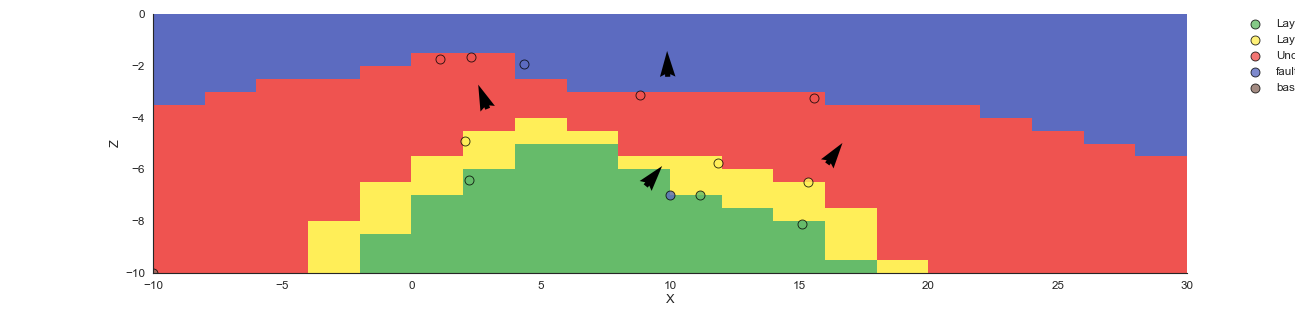

In [19]:
%matplotlib notebook
gp.plot_section(geo_data, s[0][0], 10, plot_data=True)

In [ ]:
# This is the creation of the model
import pymc3 as pm

theano.config.compute_test_value = 'warn'
dtype='float64'
#theano.config.warn_float64 = 'warn'
model = pm.Model()
with model:
    # We create the Stochastic parameters. In this case only the Z position
    # of the interfaces
    Z_rest = pm.Normal('Z_unc_rest',
       interp_data_grav.interpolator.pandas_rest_layer_points['Z'].values.astype('float32'),
       interp_data_grav.interpolator.pandas_rest_layer_points['Z_std'].values.astype('float32'),
                  dtype=dtype, shape = (66))
    
    Z_ref = pm.Normal('Z_unc_ref', interp_data_grav.interpolator.pandas_ref_layer_points_rep['Z'].values.astype('float32'),
              interp_data_grav.interpolator.pandas_ref_layer_points_rep['Z_std'].values.astype('float32'),
              dtype=dtype, shape = (66))
    
    dip_unc = pm.Normal('dip_unc', interp_data_grav.geo_data_res.orientations['dip'].values,
                        interp_data_grav.geo_data_res.orientations['dip_std'].values,
                       dtype=dtype, shape = (41))
    
    azimuth_unc = pm.Normal('azimuth_unc', interp_data_grav.geo_data_res.orientations['azimuth'].values, 
                            interp_data_grav.geo_data_res.orientations['azimuth_std'].values,
                       dtype=dtype, shape = (41))
    
#     Z_unc = pm.Normal('Z_unc', interp_data_grav.geo_data_res.interfaces['Z'].astype('float32'),
#                       interp_data_grav.geo_data_res.interfaces['Z_std'].astype('float32'), dtype='float32', shape= (70))
    
#     interp_data_grav.geo_data_res.interfaces['Z'] = Z_unc
    
    # We convert a python variable to theano.shared
    input_sh = []
    for i in interp_data_grav.get_input_data():
        input_sh.append(theano.shared(i))
    
    # We add the stochastic value to the correspondant array. rest array is
    # a n_points*3 (XYZ) array. We only want to change Z in this case.
    input_sh[4] = T.set_subtensor(
    input_sh[4][:, 2], Z_ref)

    input_sh[5] = T.set_subtensor(
    input_sh[5][:, 2], Z_rest)
    
    # With the stochastic parameters we create the geomodel result:
    Forw = pm.Deterministic('GemPy', geomodel(input_sh[0], input_sh[1], input_sh[2],
                                                   input_sh[3], input_sh[4], input_sh[5]))
    
    # Calibration parameters
    F_min, F_max =  T.min(Forw), T.max(Forw)   #36.630742, 36.651496    #30.159309, 30.174104#
    F_range = F_max - F_min
    F_mid = 0.5*(F_max+F_min)
    
    Reescaled_forw = grav_real_mid + (Forw - F_mid) / F_range * grav_real_range
    
    e_sq = T.sqrt(T.sum(T.square(Reescaled_forw - (grav_real_th))))

    Y_obs = pm.HalfCauchy('Y_obs', beta=e_sq, observed=1000)

In [ ]:
theano.config.compute_test_value = 'off'
# This is the sampling
# BEFORE RUN THIS FOR LONG CHECK IN THE MODULE THEANOGRAF THAT THE FLAG 
# THEANO OPTIMIZER IS IN 'fast_run'!!
with model:
   # backend = pm.backends.ndarray.NDArray('geomodels')
    #step = pm.NUTS()
    trace = pm.sample(30, tune=10, n_init=10, live_plot=True, refresh_every=1, cores=1 )